In [100]:
import numpy as np 
import pandas as pd 
import plotly.express as px 
from textblob import TextBlob 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import plotly.graph_objs as go
import plotly.figure_factory as ff 
%matplotlib inline
df = pd.read_csv('netflix_titles.csv')

In [101]:
df.shape


(8807, 12)

In [102]:
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [103]:
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [104]:
df.size

105684

In [105]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [106]:
x=df.groupby(['rating']).size().reset_index(name='counts')
print(x)

      rating  counts
0     66 min       1
1     74 min       1
2     84 min       1
3          G      41
4      NC-17       3
5         NR      80
6         PG     287
7      PG-13     490
8          R     799
9      TV-14    2160
10      TV-G     220
11     TV-MA    3207
12     TV-PG     863
13      TV-Y     307
14     TV-Y7     334
15  TV-Y7-FV       6
16        UR       3


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [108]:
df.drop_duplicates()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [109]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [142]:
round(df.isnull().sum()/df.shape[0]*100,4).sort_values(ascending=False)

country         9.4357
date_added      0.1135
rating          0.0454
duration        0.0341
show_id         0.0000
type            0.0000
title           0.0000
director        0.0000
cast            0.0000
release_year    0.0000
listed_in       0.0000
description     0.0000
dtype: float64

In [111]:
df['director'].value_counts().head(6)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Name: count, dtype: int64

In [135]:
df['country'].value_counts().head(6)

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Name: count, dtype: int64

In [161]:
df['listed_in'].value_counts().head(10)

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64

In [160]:
df['cast'].value_counts().head(10).sort_values(ascending=False)

cast
No cast specified                                                                                                         825
David Attenborough                                                                                                         19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                    14
Samuel West                                                                                                                10
Jeff Dunham                                                                                                                 7
David Spade, London Hughes, Fortune Feimster                                                                                6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath      6
Craig Sechler                                                                                                    

In [112]:
go.Figure(data=[go.Pie(labels=df.type.value_counts(normalize=True).index,values=df.type.value_counts(normalize=True).values,hole=0.5,title="Movies vs Tv Shows")])

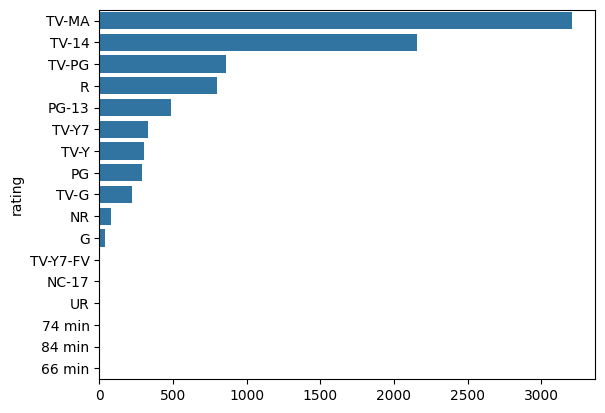

In [134]:
rating_counts = df['rating'].value_counts()
sns.barplot(x=rating_counts.values, y=rating_counts.index, orient="h")
plt.show()

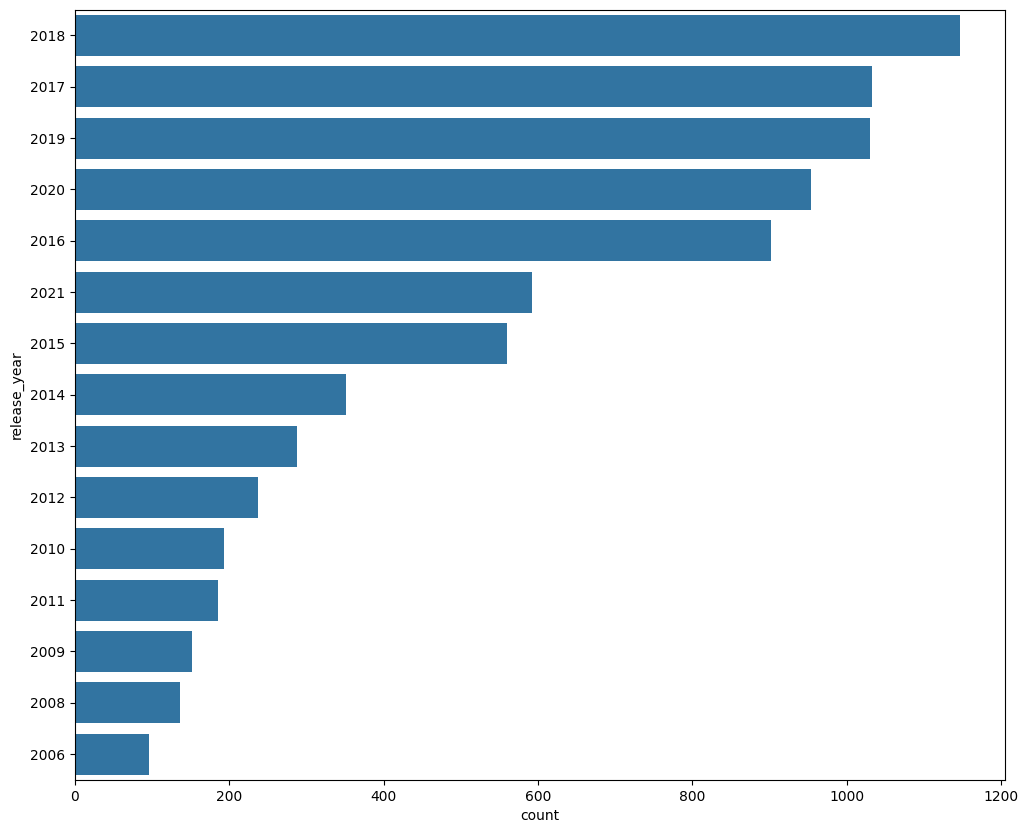

In [139]:
plt.figure(figsize=(12,10))
ax=sns.countplot(y="release_year",data=df,order=df['release_year'].value_counts().index[0:15])

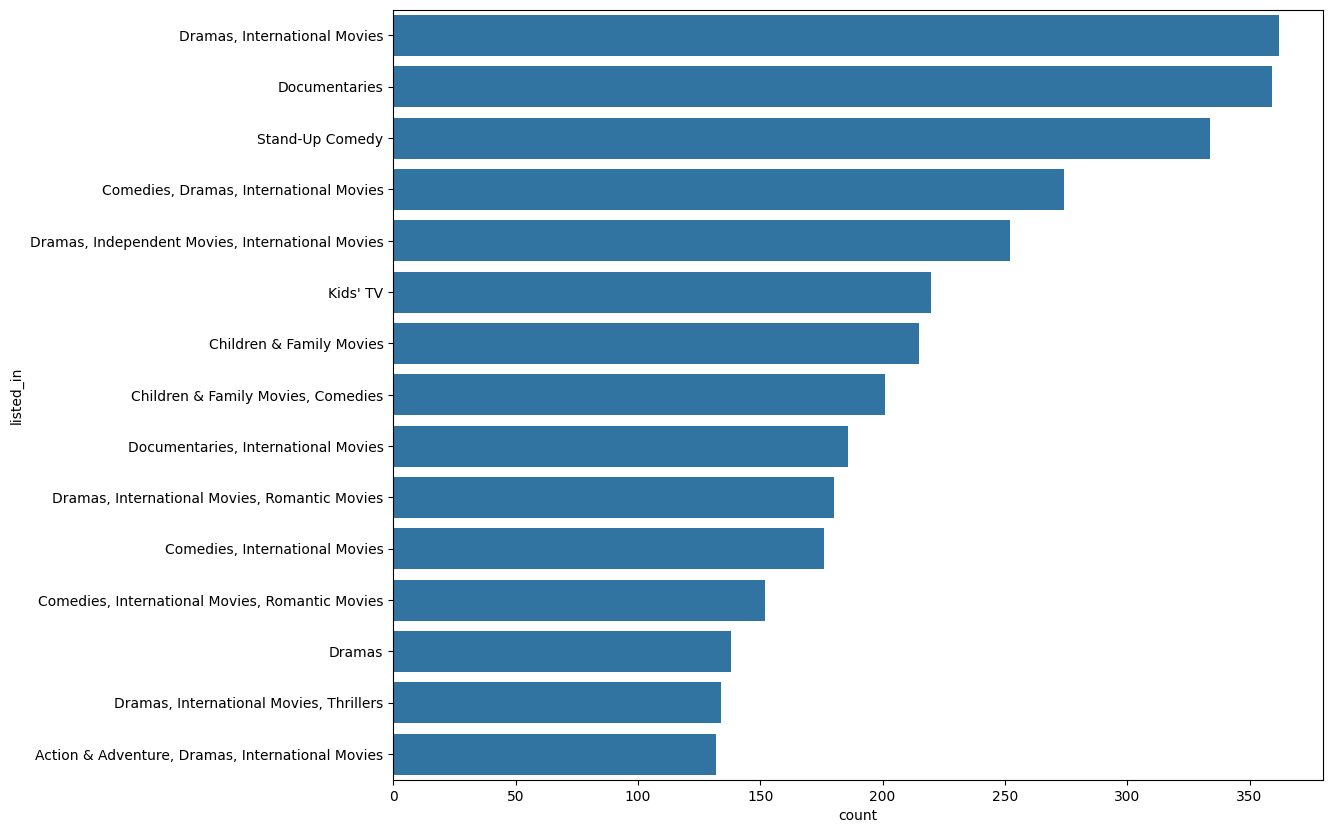

In [141]:
plt.figure(figsize=(12,10))
ax=sns.countplot(y="listed_in",data=df,order=df['listed_in'].value_counts().index[0:15])

In [144]:
df.dropna(subset=['rating','duration','date_added'],axis=0,inplace=True)

In [146]:
df.shape

(8790, 12)

In [147]:
round(df.isnull().sum()/df.shape[0]*100,4).sort_values(ascending=False)

country         9.4312
show_id         0.0000
type            0.0000
title           0.0000
director        0.0000
cast            0.0000
date_added      0.0000
release_year    0.0000
rating          0.0000
duration        0.0000
listed_in       0.0000
description     0.0000
dtype: float64

In [148]:
df['country'].replace(np.NaN,"Unknown",inplace=True)

In [149]:
round(df.isnull().sum()/df.shape[0]*100,4).sort_values(ascending=False)

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

In [113]:
piechart=px.pie(x,values='counts',names='rating' ,title='Distribution of content on Netflix')
piechart.show()

In [200]:
movies_df=df.loc[(df['type']=="Movie")]
movies_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast specified,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [201]:
show_df=df.loc[(df['type']=="TV Show")]
show_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [202]:
movies_df.duration=movies_df.duration.apply(lambda x:x.replace("min","")if 'min' in x else x)
movies_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast specified,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [204]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6126 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6126 non-null   object
 1   type          6126 non-null   object
 2   title         6126 non-null   object
 3   director      6126 non-null   object
 4   cast          6126 non-null   object
 5   country       6126 non-null   object
 6   date_added    6126 non-null   object
 7   release_year  6126 non-null   int64 
 8   rating        6126 non-null   object
 9   duration      6126 non-null   object
 10  listed_in     6126 non-null   object
 11  description   6126 non-null   object
dtypes: int64(1), object(11)
memory usage: 622.2+ KB


In [205]:
movies_df.loc[:,["duration"]]=movies_df.loc[:, ["duration"]].apply(lambda x: x.astype("int64", errors= "ignore"))
movies_df.describe()


,release_year
count,6126.000000
mean,2013.120144
std,9.681723
min,1942.000000
25%,2012.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


In [206]:
shortest=movies_df.loc[(movies_df['duration']==np.min(movies_df.duration))]
shortest

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3777,s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",No cast specified,United States,"June 4, 2019",2014,TV-Y,3,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ..."


In [207]:
longest=movies_df.loc[(movies_df['duration']==np.max(movies_df.duration))]
longest

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4253,s4254,Movie,Black Mirror: Bandersnatch,Director not specified,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question..."


In [208]:
longest_movies=movies_df.loc[(movies_df['duration']>=100)]
longest_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...
22,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",Unknown,"September 21, 2021",1996,TV-PG,161,"Comedies, International Movies",Newly divorced and denied visitation rights wi...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
8790,s8791,Movie,You Don't Mess with the Zohan,Dennis Dugan,"Adam Sandler, John Turturro, Emmanuelle Chriqu...",United States,"September 1, 2019",2008,UR,113,"Action & Adventure, Comedies",An Israeli counterterrorism soldier with a sec...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120,"Dramas, International Movies",A change in the leadership of a political part...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."


In [209]:
show_df.duration=show_df.duration.apply(lambda x:x.replace("Season","")if 'Season' in x else x)
show_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 s,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [210]:
show_df.duration=show_df.duration.apply(lambda x:x.replace("s","")if 's' in x else x)
show_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [212]:
show_df.describe()

,release_year
count,2664.000000
mean,2016.627628
std,5.735194
min,1925.000000
25%,2016.000000
50%,2018.000000
75%,2020.000000
max,2021.000000


In [215]:
show_df.duration.value_counts().tail(10)

duration
6     33
7     23
8     17
9      9
10     6
13     2
15     2
12     2
17     1
11     1
Name: count, dtype: int64

In [216]:
longest_shows=show_df.loc[(show_df['duration']>=13)]
longest_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
548,s549,TV Show,Grey's Anatomy,Director not specified,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,"July 3, 2021",2020,TV-14,17,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...
1354,s1355,TV Show,Heartland,Director not specified,"Amber Marshall, Michelle Morgan, Graham Wardle...",Canada,"February 1, 2021",2019,TV-14,13,TV Dramas,Spunky teenager Amy is reeling from the sudden...
2423,s2424,TV Show,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...","United States, Canada","June 5, 2020",2019,TV-14,15,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ..."
4220,s4221,TV Show,COMEDIANS of the world,Director not specified,"Neal Brennan, Chris D'Elia, Nicole Byer, Nick ...",United States,"January 1, 2019",2019,TV-MA,13,"Stand-Up Comedy & Talk Shows, TV Comedies",This global stand-up comedy series features a ...
4798,s4799,TV Show,NCIS,Director not specified,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,"July 1, 2018",2017,TV-14,15,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Nav...


In [217]:
longest_shows.rating.value_counts()

rating
TV-14    4
TV-MA    1
Name: count, dtype: int64

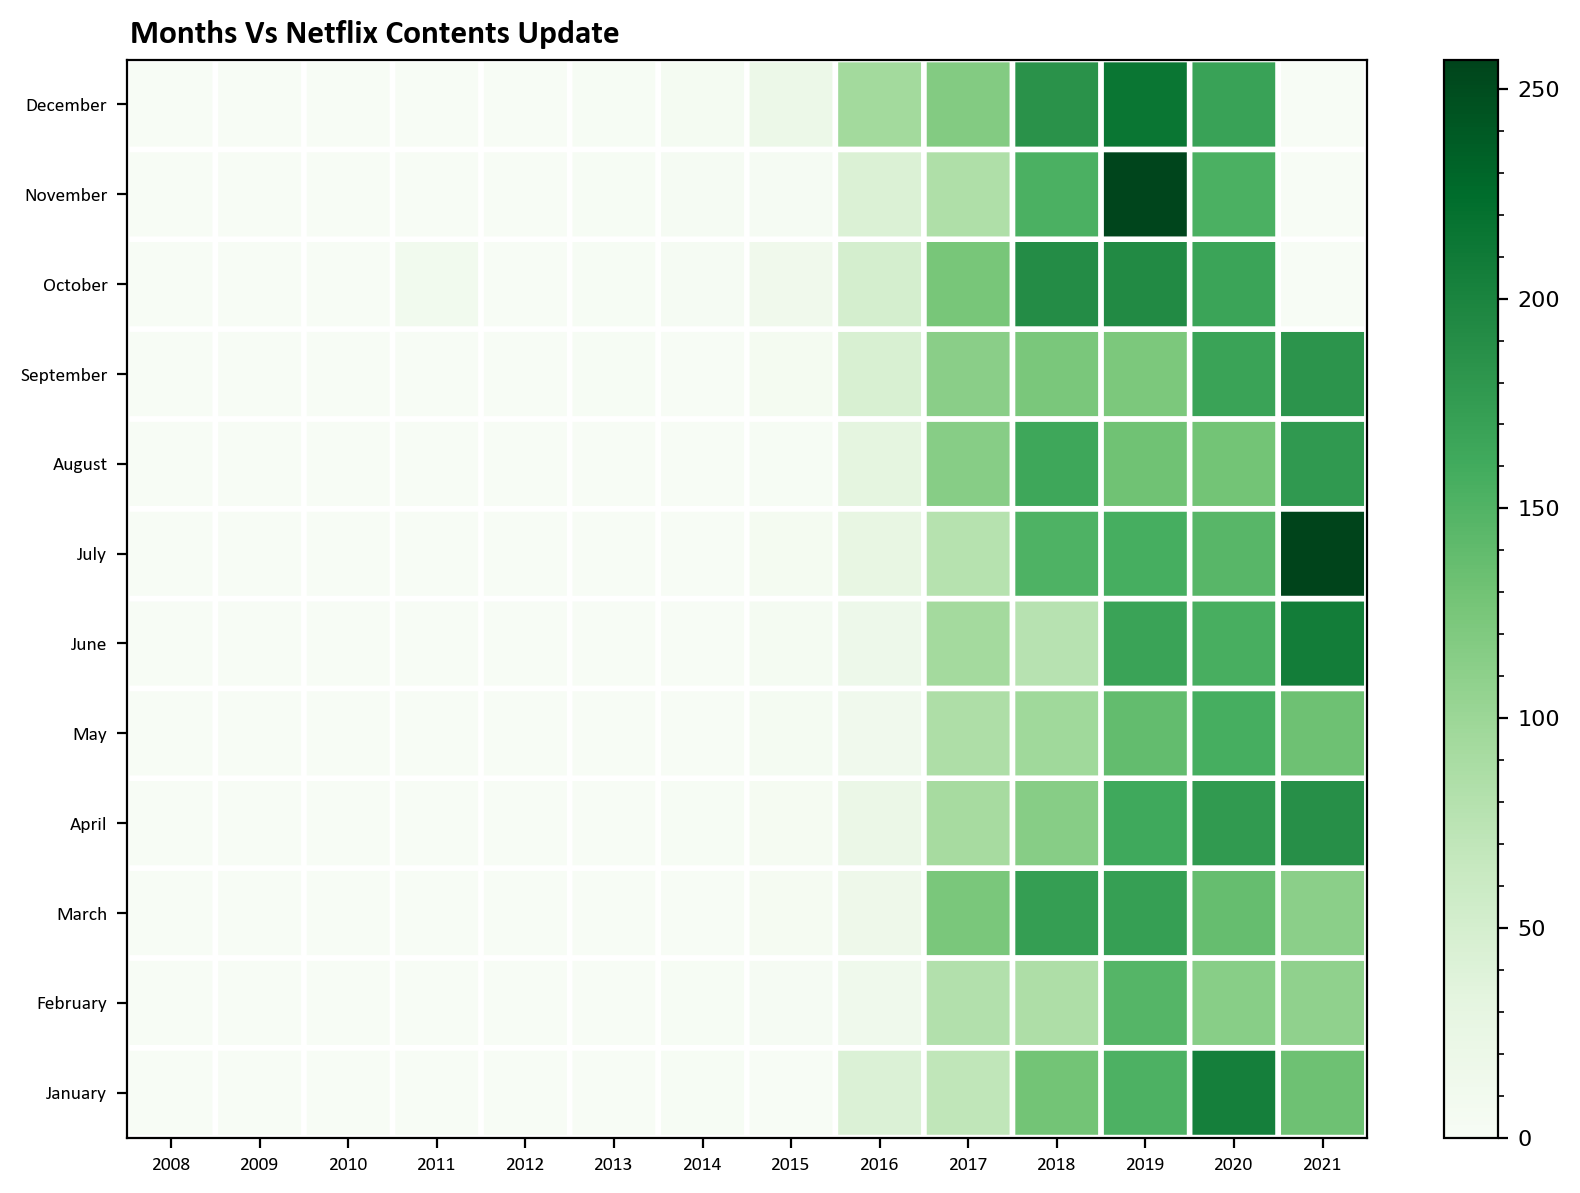

In [222]:
netflix_date=df[["date_added"]].dropna()
netflix_date['year'] = netflix_date["date_added"].apply(lambda x: x.split(', ')[-1])

netflix_date['month'] = netflix_date['date_added'].apply(lambda x: x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

new_df =netflix_date.groupby("year")["month"].value_counts().unstack().fillna(0) [month_order].T

plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(new_df, cmap='Greens', edgecolors='white', linewidths=2) # heatmap

plt.xticks(np.arange(0.5, len(new_df.columns), 1), new_df.columns, fontsize=7, fontfamily="calibri")
plt.yticks(np.arange(0.5, len(new_df.index), 1), new_df.index, fontsize=7, fontfamily='calibri')

plt.title('Months Vs Netflix Contents Update', fontsize=12, fontfamily="calibri", fontweight="bold", position=(0.20, 1.0+0.02))
cbar=plt.colorbar()

cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()

plt.show()


In [114]:
df['director']=df['director'].fillna('Director not specified')

In [115]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director not specified,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [116]:
directors_list=pd.DataFrame()
print(directors_list)

Empty DataFrame
Columns: []
Index: []


In [192]:
directors_list=df['director'].str.split(',',expand=True).stack()
print(directors_list)

0     0           Kirsten Johnson
1     0    Director not specified
2     0           Julien Leclercq
3     0    Director not specified
4     0    Director not specified
                    ...          
8802  0             David Fincher
8803  0    Director not specified
8804  0           Ruben Fleischer
8805  0              Peter Hewitt
8806  0               Mozez Singh
Length: 9595, dtype: object


In [118]:
directors_list=directors_list.to_frame()
print(directors_list)


                             0
0    0         Kirsten Johnson
1    0  Director not specified
2    0         Julien Leclercq
3    0  Director not specified
4    0  Director not specified
...                        ...
8802 0           David Fincher
8803 0  Director not specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]


In [119]:
directors_list.columns=['Directors']
print(directors_list)


                     Directors
0    0         Kirsten Johnson
1    0  Director not specified
2    0         Julien Leclercq
3    0  Director not specified
4    0  Director not specified
...                        ...
8802 0           David Fincher
8803 0  Director not specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]


In [120]:
director=directors_list.groupby(['Directors']).size().reset_index(name='Total Count')
print(director)

                      Directors  Total Count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5116                Çagan Irmak            1
5117           Ísold Uggadóttir            1
5118        Óskar Thór Axelsson            1
5119           Ömer Faruk Sorak            2
5120               Şenol Sönmez            2

[5121 rows x 2 columns]


In [121]:
director=director[director['Directors']!='Director not specified']
print(director)

                      Directors  Total Count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5116                Çagan Irmak            1
5117           Ísold Uggadóttir            1
5118        Óskar Thór Axelsson            1
5119           Ömer Faruk Sorak            2
5120               Şenol Sönmez            2

[5120 rows x 2 columns]


In [122]:
director=director.sort_values(by=['Total Count'],ascending=False)
print(director)

            Directors  Total Count
4021    Rajiv Chilaka           22
4068      Raúl Campos           18
261         Jan Suter           18
4652      Suhas Kadav           16
3236     Marcus Raboy           16
...               ...          ...
2341         J. Davis            1
2342  J. Lee Thompson            1
2343  J. Michael Long            1
609    Smriti Keshari            1
2561    Joaquín Mazón            1

[5120 rows x 2 columns]


In [123]:
top5directors=director.head()
print(top5directors)

          Directors  Total Count
4021  Rajiv Chilaka           22
4068    Raúl Campos           18
261       Jan Suter           18
4652    Suhas Kadav           16
3236   Marcus Raboy           16


In [124]:
top5directors=top5directors.sort_values(by='Total Count')
barchart=px.bar(top5directors,x='Total Count',y='Directors',title='Top 5 Directors on Netflix')
barchart.show()

In [186]:
df['cast'] = df['cast'].fillna('No cast specified')
cast_df = df['cast'].str.split(',', expand=True).stack().str.strip()
cast_df = cast_df.to_frame(name='Actor')
cast_df = cast_df[cast_df['Actor'] != 'No cast specified']
actor_counts = cast_df['Actor'].value_counts().reset_index()
actor_counts.columns = ['Actor', 'Total Count']
top5actors = actor_counts.head(5).sort_values(by='Total Count', ascending=False)
barChart2 = px.bar(top5actors, x='Total Count', y='Actor', title='Top 5 Actors on Netflix', orientation='h')
barChart2.show()


In [126]:
df1=df[['type','release_year']] 
df1=df1.rename(columns={'release_year':'Release Year','type':'Type'})
df2=df1.groupby(['Release Year','Type']).size().reset_index(name='Total Count')

In [127]:
print(df2)

     Release Year     Type  Total Count
0            1925  TV Show            1
1            1942    Movie            2
2            1943    Movie            3
3            1944    Movie            3
4            1945    Movie            3
..            ...      ...          ...
114          2019  TV Show          397
115          2020    Movie          517
116          2020  TV Show          436
117          2021    Movie          277
118          2021  TV Show          315

[119 rows x 3 columns]


In [128]:
df2 = df2[df2['Release Year']>=2000]
graph = px.line(df2, x = "Release Year", y="Total Count", color = "Type", title = "Trend of Content Produced on Netfilx Every Year")
graph.show()

In [129]:
df3=df[['type','country']] 
df3=df3.rename(columns={'country':'Country','type':'Type'})
df4=df3.groupby(['Country','Type']).size().reset_index(name='Total Count')

In [130]:
country_counts = df4.groupby('Country')['Total Count'].sum().reset_index()
top_countries = country_counts.nlargest(10, 'Total Count')['Country']
df4 = df4[df4['Country'].isin(top_countries)]

barChart3 = px.bar(df4, x="Total Count", y="Country", color="Type", title="Top 10 Countries With the Most Content Producted")
barChart3.show()

In [131]:
df5=df[['release_year','description']]
df5=df5.rename(columns={'release_year':'Release Year','description':'Description'})
df5['Sentiment'] = None

for index,row in df5.iterrows():
    d=row['Description']
    testimonial=TextBlob(d)
    p=testimonial.sentiment.polarity
    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    df5.at[index,'Sentiment']=sent

df5=df5.groupby(['Release Year','Sentiment']).size().reset_index(name='Total Count')
df5=df5[df5['Release Year']>2005]
barGraph=px.bar(df5,x='Release Year',y='Total Count',color='Sentiment',title='Sentiment Analysis of Content on Netflix')
barGraph.show()